In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit
sns.style=('darkgrid')

In [13]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [14]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

In [19]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

In [28]:
#add Transformers

numeric_mean_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", MinMaxScaler()),
        ("pca2to1", PCA(n_components=1))
    ]
)

numeric_median_preprocessor = Pipeline(
    steps=[
        ("imputation_median", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", MinMaxScaler()),
    ]
)

categorical_ohe_preprocessor = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

categorical_ordinal_preprocessor = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder())
    ]
)

preprocessor = ColumnTransformer([
        ("numeric_mean_preprocessor", numeric_mean_preprocessor, ['Fare','Pclass']),
        ("numeric_median_preprocessor", numeric_median_preprocessor, ['Age']),
        ("categorical_ohe_preprocessor", categorical_ohe_preprocessor, ['Embarked']),
        ("categorical_ordinal_preprocessor", categorical_ordinal_preprocessor, ['Sex'])
    ], remainder=StandardScaler()
)
set_config(display="diagram")
preprocessor

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('numeric_mean_preprocessor',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler()),
                                                 ('pca2to1',
                                                  PCA(n_components=1))]),
                                 ['Fare', 'Pclass']),
                                ('numeric_median_preprocessor',
                                 Pipeline(steps=[('imputation_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age']),
                                ('categorical_ohe_preprocessor',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Embarked']),
                                ('categorical_ordinal_preprocessor',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Sex'])])

In [65]:
# your pipline
pipeline = Pipeline(
    steps=[
        ("columnDropper", columnDropperTransformer(['PassengerId','Name', 'Cabin', 'Ticket'])),
        ("preprocessor", preprocessor),
        ("classifier", SVC(kernel='rbf'))
    ]
)

# apply the pipeline to dataframe
# pd.DataFrame(pipeline.fit_transform(train_data)).describe()

# parametres for SVC:
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__gamma' : [0.001, 0.01, 0.1]}

# parametres for RandomForestClassifier:
param_distributions = {
    "classifier__n_estimators": [120, 150, 200],
    "classifier__max_features": [3, 7, 10],
    "classifier__min_samples_split": [2, 4, 7],
    "classifier__min_samples_leaf": [2, 4, 6],

}
grid = GridSearchCV(pipeline, cv=5, param_grid=param_grid, n_jobs=6)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columnDropper',
                                        <__main__.columnDropperTransformer object at 0x7f26e22bf430>),
                                       ('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('numeric_mean_preprocessor',
                                                                         Pipeline(steps=[('imputation_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('pca2to1',
                                                                                          PCA(n_components=1))]),
                                                                         ['Fare',
                                                                          'Pclas...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Embarked']),
                                                                        ('categorical_ordinal_preprocessor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex'])])),
                                       ('classifier', SVC())]),
             n_jobs=6,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1]})

In [66]:
# print(grid.best_estimator_.named_steps["pca"].components_)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)
test_preds = grid.predict(test_data)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_preds})
output.to_csv('submission.csv', index=False)

Pipeline(steps=[('columnDropper',
                 <__main__.columnDropperTransformer object at 0x7f26e235dfc0>),
                ('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('numeric_mean_preprocessor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca2to1',
                                                                   PCA(n_components=1))]),
                                                  ['Fare', 'Pclass']),
                                                 ('numeric_median_prepro...
                                                  ['Age']),
   

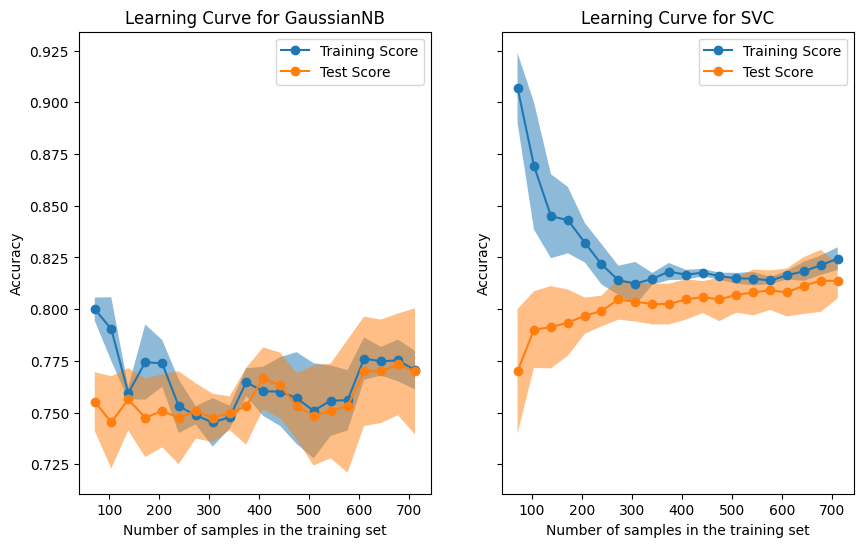

In [69]:
pipeline_score = Pipeline(
    steps=[
        ("columnDropper", columnDropperTransformer(['PassengerId','Name', 'Cabin', 'Ticket'])),
        ("preprocessor", preprocessor),
    ]
)
    
X_train_score = pipeline_score.fit_transform(X_train)
y_train_score = y_train

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", C=10, gamma=0.1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train_score,
    "y": y_train_score,
    "train_sizes": np.linspace(0.1, 1.0, 20),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 6,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")